# Growth Stock Portfolio

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# yahoo finance data 
import yfinance as yf
yf.pdr_override()

In [55]:
# input
# Growth Stock
title = "Growth Stock for July"
symbols = ['STNE', 'CRWD', 'ZNGA']
start = '2020-04-01'
end = '2022-03-26'

In [56]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [57]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
1 years


In [58]:
number_of_years = delta.years

In [59]:
days = (df.index[-1] - df.index[0]).days
days

724

In [60]:
df.head()

,STNE,CRWD,ZNGA
Date,,,
2020-03-31,21.770000,55.680000,6.85
2020-04-01,19.530001,54.580002,6.76
2020-04-02,19.879999,56.689999,6.68
2020-04-03,17.820000,57.820000,6.64
2020-04-06,22.240000,59.070000,6.81


In [61]:
df.tail()

,STNE,CRWD,ZNGA
Date,,,
2022-03-21,13.33,204.130005,9.05
2022-03-22,14.32,217.059998,9.12
2022-03-23,14.23,219.479996,9.09
2022-03-24,14.35,223.399994,9.09
2022-03-25,12.30,221.949997,9.18


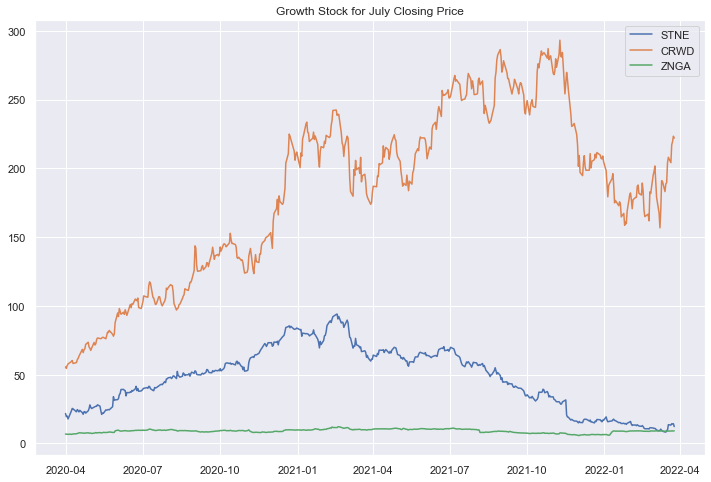

In [62]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title(title + ' Closing Price')
plt.legend(labels=df.columns)

In [63]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

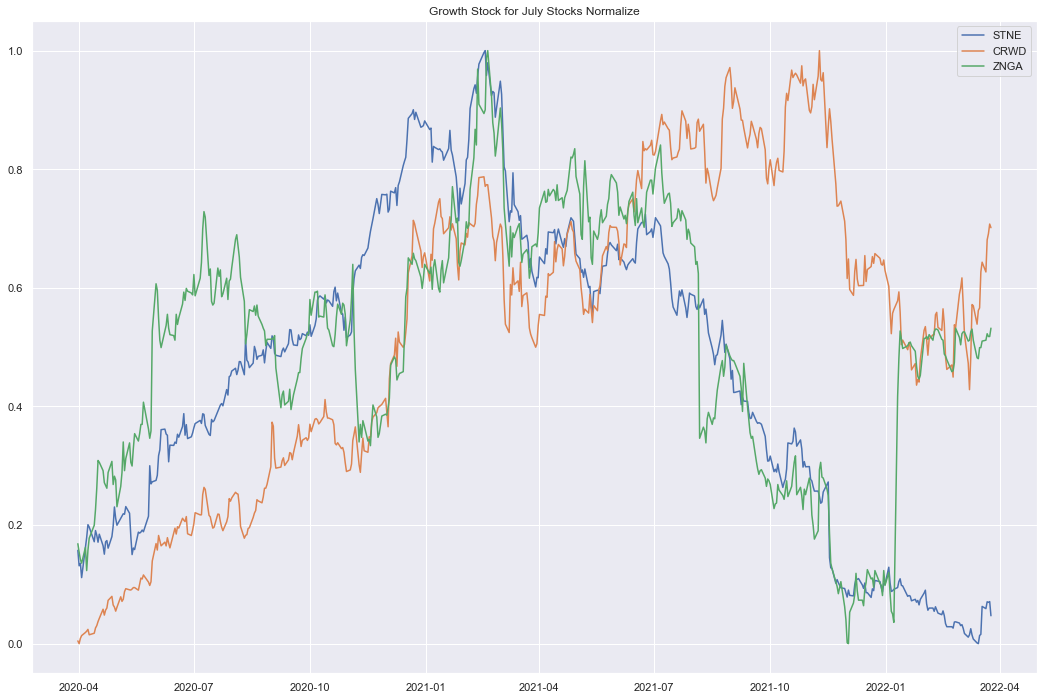

In [64]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(title + ' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [65]:
stock_rets = df.pct_change().dropna()

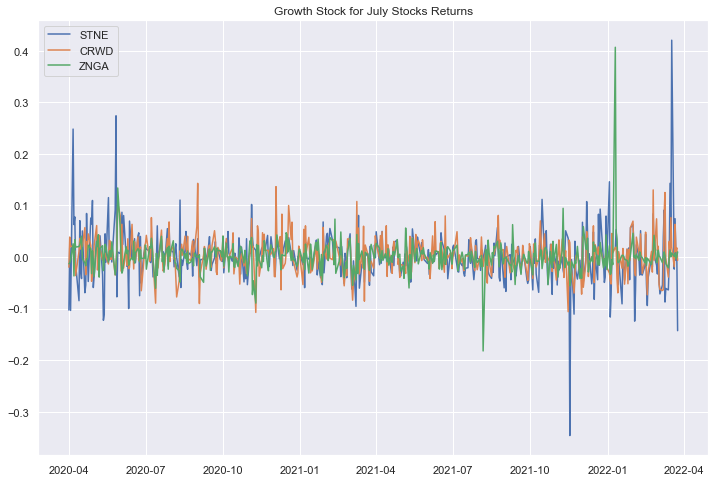

In [66]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title(title + ' Stocks Returns')
plt.legend(labels=stock_rets.columns)

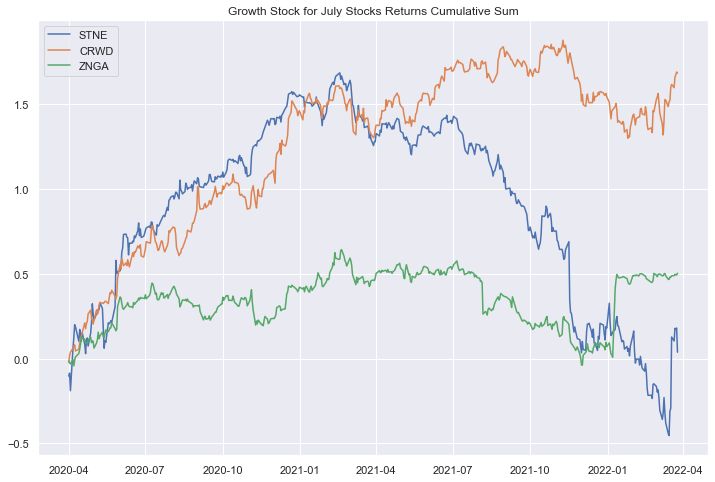

In [67]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title(title + ' Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

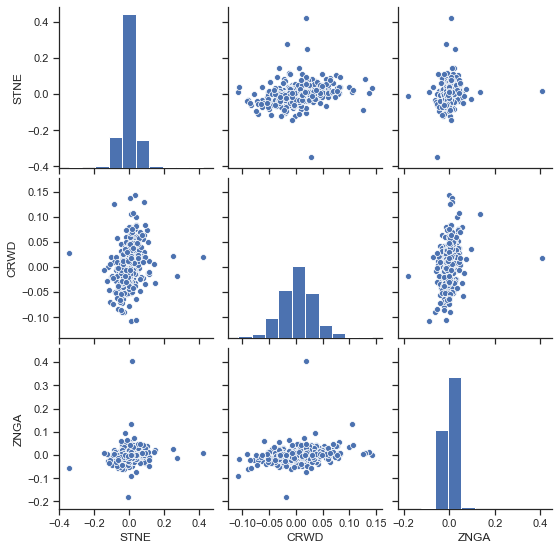

In [68]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

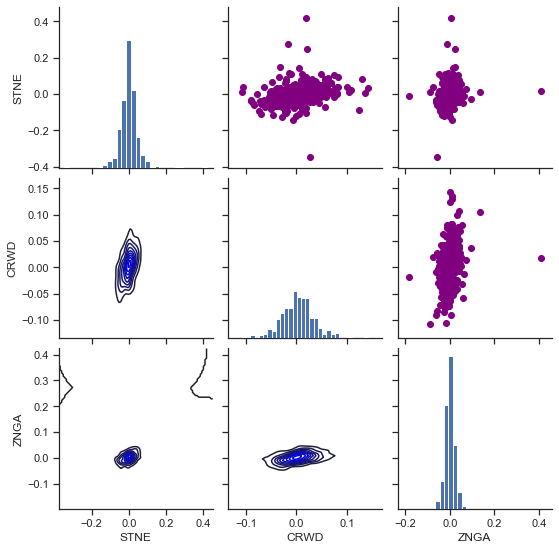

In [69]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

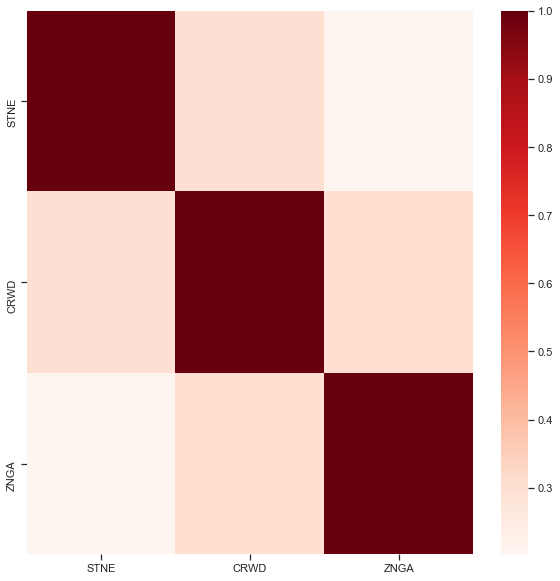

In [70]:
plt.figure(figsize=(10,10))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

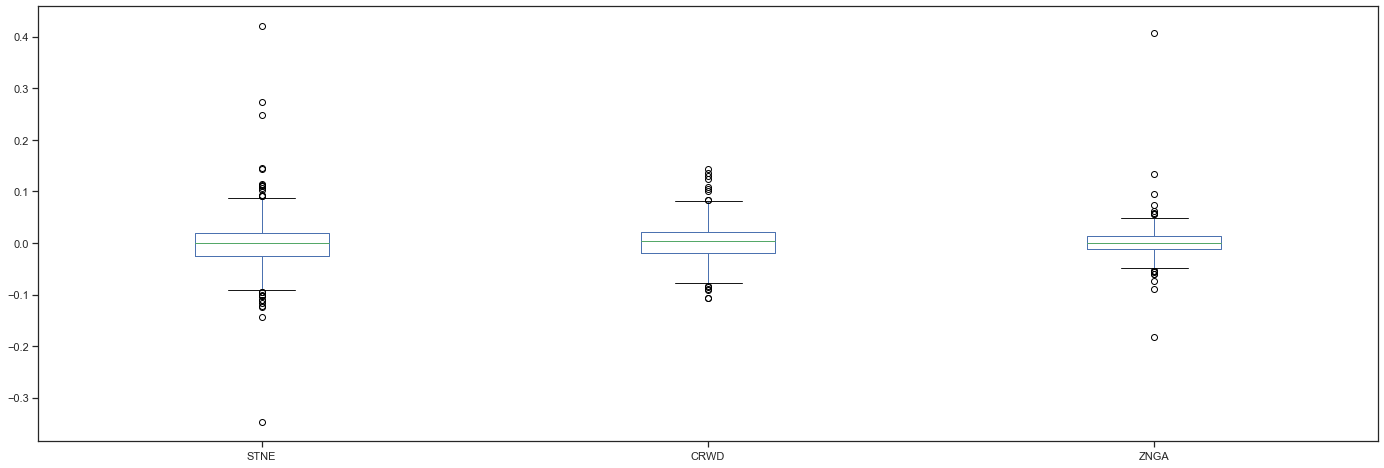

In [71]:
# Box plot
stock_rets.plot(kind='box',figsize=(24,8))

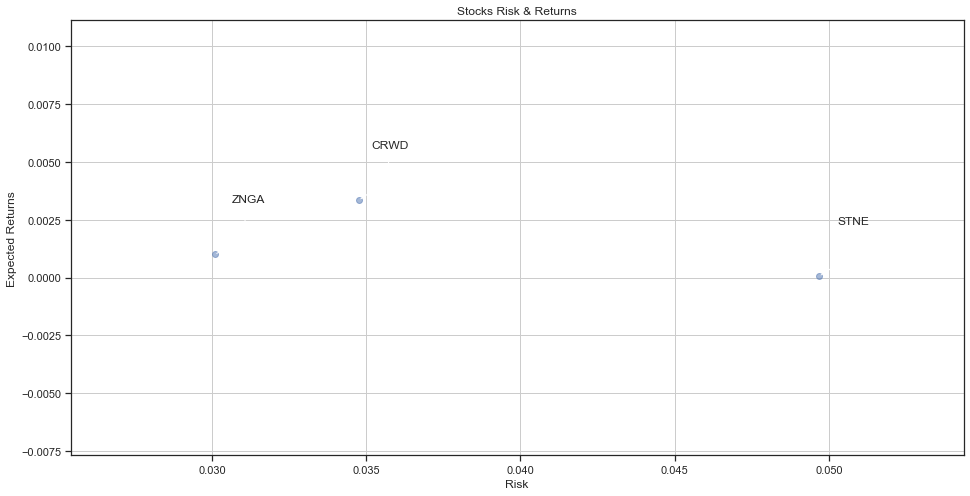

In [72]:
rets = stock_rets.dropna()

plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.std(), rets.mean()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

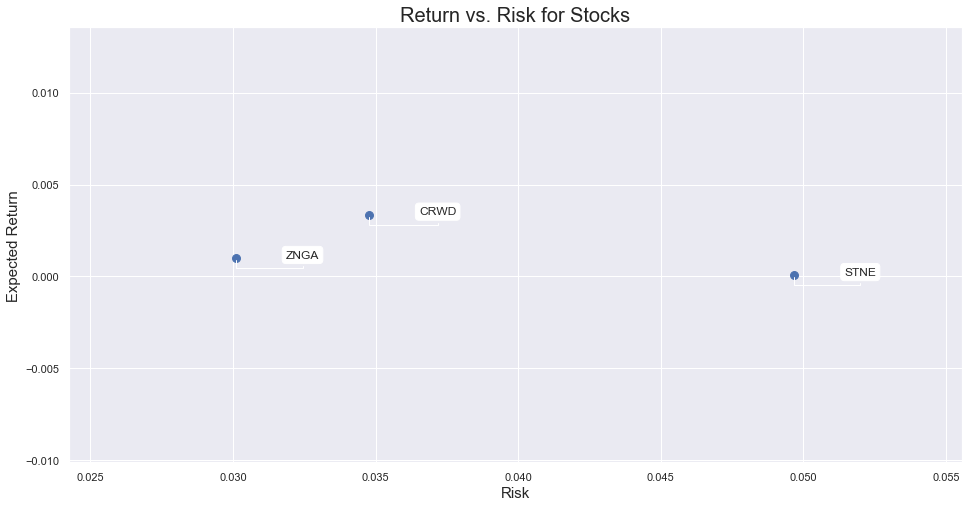

In [73]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(), s=area)
plt.xlabel("Risk", fontsize=15)
plt.ylabel("Expected Return", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.std(), rets.mean()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [74]:
def annual_risk_return(stock_rets):
    tradeoff = stock_rets.agg(["mean", "std"]).T
    tradeoff.columns = ["Return", "Risk"]
    tradeoff.Return = tradeoff.Return*252
    tradeoff.Risk = tradeoff.Risk * np.sqrt(252)
    return tradeoff

In [75]:
tradeoff = annual_risk_return(stock_rets)
tradeoff

,Return,Risk
STNE,0.019152,0.788769
CRWD,0.847195,0.551949
ZNGA,0.253508,0.477823


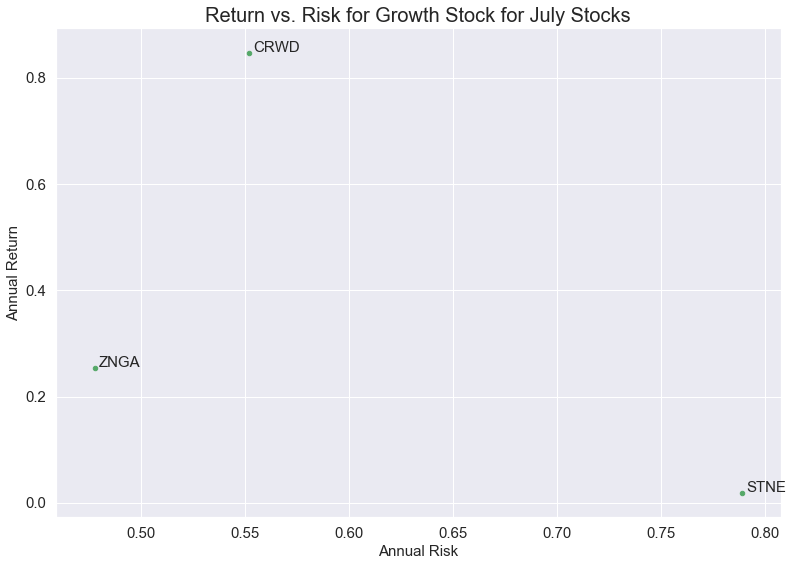

In [76]:
import itertools

colors = itertools.cycle(["r", "b", "g"])

tradeoff.plot(x = "Risk", y = "Return", kind = "scatter", figsize = (13,9), s = 20, fontsize = 15, c='g')
for i in tradeoff.index:
    plt.annotate(i, xy=(tradeoff.loc[i, "Risk"]+0.002, tradeoff.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("Annual Risk", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Return vs. Risk for " + title + " Stocks", fontsize = 20)
plt.show()

In [77]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

ZNGA  ZNGA    1.000000
CRWD  CRWD    1.000000
STNE  STNE    1.000000
ZNGA  CRWD    0.306499
CRWD  ZNGA    0.306499
      STNE    0.302531
STNE  CRWD    0.302531
ZNGA  STNE    0.202396
STNE  ZNGA    0.202396
dtype: float64

In [78]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,STNE,CRWD,ZNGA
Date,,,
2020-04-01,0.317366,0.350448,0.287085
2020-04-02,0.474970,0.583799,0.289300
2020-04-03,0.316416,0.508994,0.299228
2020-04-06,0.775156,0.515729,0.352875
2020-04-07,0.533710,0.465209,0.247054


In [79]:
Normalized_Value.corr()

,STNE,CRWD,ZNGA
STNE,1.000000,0.302531,0.202396
CRWD,0.302531,1.000000,0.306499
ZNGA,0.202396,0.306499,1.000000


In [80]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

ZNGA  ZNGA    1.000000
CRWD  CRWD    1.000000
STNE  STNE    1.000000
ZNGA  CRWD    0.306499
CRWD  ZNGA    0.306499
      STNE    0.302531
STNE  CRWD    0.302531
ZNGA  STNE    0.202396
STNE  ZNGA    0.202396
dtype: float64

In [81]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
STNE    0.000076
CRWD    0.003362
ZNGA    0.001006
dtype: float64
--------------------------------------------------
Stock risks:
STNE    0.049688
CRWD    0.034770
ZNGA    0.030100
dtype: float64


In [82]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
STNE,0.000076,0.049688
ZNGA,0.001006,0.030100
CRWD,0.003362,0.034770


In [83]:
table.sort_values(by='Risk')

,Returns,Risk
ZNGA,0.001006,0.030100
CRWD,0.003362,0.034770
STNE,0.000076,0.049688


In [84]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
STNE,0.000076,0.049688,-0.199727
CRWD,0.003362,0.034770,-0.190918
ZNGA,0.001006,0.030100,-0.298805


In [85]:
table['Max Returns'] = rets.max()

In [86]:
table['Min Returns'] = rets.min()

In [87]:
table['Median Returns'] = rets.median()

In [88]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
STNE,0.000076,0.049688,-0.199727,0.420395,-0.346178,0.000000,-14.285715
CRWD,0.003362,0.034770,-0.190918,0.142846,-0.107483,0.003163,-0.649059
ZNGA,0.001006,0.030100,-0.298805,0.406667,-0.182190,0.000000,0.990101


In [89]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
STNE,0.000076,0.049688,-0.199727,0.420395,-0.346178,0.000000,-14.285715,-0.000213
CRWD,0.003362,0.034770,-0.190918,0.142846,-0.107483,0.003163,-0.649059,-0.000009
ZNGA,0.001006,0.030100,-0.298805,0.406667,-0.182190,0.000000,0.990101,0.000014


In [90]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
STNE,0.000076,0.049688,-0.199727,0.420395,-0.346178,0.000000,-14.285715,-0.000213,-0.180223
CRWD,0.003362,0.034770,-0.190918,0.142846,-0.107483,0.003163,-0.649059,-0.000009,0.618204
ZNGA,0.001006,0.030100,-0.298805,0.406667,-0.182190,0.000000,0.990101,0.000014,0.107280


In [91]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
STNE,0.000076,0.049688,-0.199727,0.420395,-0.346178,0.000000,-14.285715,-0.000213,-0.180223
CRWD,0.003362,0.034770,-0.190918,0.142846,-0.107483,0.003163,-0.649059,-0.000009,0.618204
ZNGA,0.001006,0.030100,-0.298805,0.406667,-0.182190,0.000000,0.990101,0.000014,0.107280
